All libraries to be imported:

will find plotting much further down in file!

In [ ]:
# to read ROOT files with python
import uproot
# use numpy for arrays
import numpy as np

import awkward as ak

# library to make and plot histograms
import hist

import matplotlib.pyplot as plt
# style library
import mplhep as hep

from scipy.stats import norm

import vector

import matplotlib.colors as colors

import coffea

Open file

In [ ]:
filename = "einclusive_240611.root"
events = uproot.open(filename)["Events"]

In [ ]:
events.keys()

['nElectron',
 'maxE',
 'maxPt',
 'Electron_e',
 'Electron_eClus',
 'Electron_zClus',
 'Electron_px',
 'Electron_py',
 'Electron_pz',
 'Electron_dx',
 'Electron_dy',
 'Electron_x',
 'Electron_y',
 'Electron_tp',
 'Electron_depth',
 'Truth_x',
 'Truth_y',
 'Truth_px',
 'Truth_py',
 'Truth_pz',
 'Truth_e',
 'Truth_pdgId',
 'TruthEcal_x',
 'TruthEcal_y',
 'TruthEcal_px',
 'TruthEcal_py',
 'TruthEcal_pz',
 'TruthEcal_e',
 'TruthEcal_pdgId',
 'Ecal_e_afterLayer',
 'Ecal_e_nLayer',
 'Hcal_e_afterLayer',
 'Hcal_e_nLayer']

Electron Data Sets:

In [ ]:
nElectron = np.asarray(events["nElectron"])
Electron_e = ak.firsts(events["Electron_e"].array()).to_numpy().data
Electron_eClus = ak.firsts(events["Electron_eClus"].array()).to_numpy().data
Electron_zClus = ak.firsts(events["Electron_zClus"].array()).to_numpy().data
Electron_px = ak.firsts(events["Electron_px"].array()).to_numpy().data
Electron_py = ak.firsts(events["Electron_py"].array()).to_numpy().data
Electron_pz = ak.firsts(events["Electron_pz"].array()).to_numpy().data
Electron_dx = ak.firsts(events["Electron_dx"].array()).to_numpy().data
Electron_dy = ak.firsts(events["Electron_dy"].array()).to_numpy().data
Electron_x = ak.firsts(events["Electron_x"].array()).to_numpy().data
Electron_y = ak.firsts(events["Electron_y"].array()).to_numpy().data
Electron_tp = ak.firsts(events["Electron_tp"].array()).to_numpy().data
Electron_depth = ak.firsts(events["Electron_depth"].array()).to_numpy().data
Electron_ecal_x = Electron_dx+Electron_x

px_squared=np.square(Electron_px)
py_squared=np.square(Electron_py)

squared_pT=px_squared+py_squared

Electron_pT=np.sqrt(squared_pT)

reco_pT_E = np.sqrt((Electron_px)**2 + (Electron_py)**2)

Truth Data Sets:

In [ ]:
Truth_x = np.asarray(events["Truth_x"])
Truth_y = np.asarray(events["Truth_y"])
Truth_px = events["Truth_px"].array().to_numpy().data
Truth_py = events["Truth_py"].array().to_numpy().data
Truth_pz = events["Truth_pz"].array().to_numpy().data
Truth_e = events["Truth_e"].array().to_numpy().data
TruthEcal_x = np.asarray(events["TruthEcal_x"])
TruthEcal_y = np.asarray(events["TruthEcal_y"])
TruthEcal_px = np.asarray(events["TruthEcal_px"])
TruthEcal_py = np.asarray(events["TruthEcal_py"])
TruthEcal_pz = events["TruthEcal_pz"].array().to_numpy().data
TruthEcal_e = np.asarray(events["TruthEcal_e"])
Truth_pdgId = np.asarray(events["Truth_pdgId"])
TruthEcal_pdgId = np.asarray(events["TruthEcal_pdgId"])
Ecal_e_afterLayer = ak.firsts(events["Ecal_e_afterLayer"].array()).to_numpy().data

Truth_px_squared=np.square(Truth_px)
Truth_py_squared=np.square(Truth_py)

squared_Truth_pT=Truth_px_squared+Truth_py_squared

TruthEcal_pT=np.sqrt(squared_Truth_pT)

TruthEcal_dx = TruthEcal_x - Truth_x
TruthEcal_dy = TruthEcal_y - Truth_y

Coffea Vector Data

In [ ]:
from coffea.nanoevents.methods import vector

reco = ak.zip(
    {
        "x": events["Electron_px"].array(),
        "y": events["Electron_py"].array(),
        "z": events["Electron_pz"].array(),
    },
    with_name="ThreeVector",
    behavior=vector.behavior,
)

truth = ak.zip(
    {"x": events["TruthEcal_px"].array(),
     "y": events["TruthEcal_py"].array(),
     "z": events["TruthEcal_pz"].array(),
    },
    with_name="ThreeVector",
    behavior=vector.behavior,
)

/var/folders/ql/y_8f_9610zndt10_t5xg_vbm0000gn/T/ipykernel_49026/3333050664.py:1: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


Closest in x&y ordering
- will use delta phi to pick particle that has been displaced the least

In [ ]:
# need to get the abs value minimum and not the negative minimum
abs_reco_phi = abs(reco.delta_phi(truth))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numba/np/ufunc/dufunc.py:287: RuntimeWarning: invalid value encountered in delta_phi
  return super().__call__(*args, **kws)


In [ ]:
phi_index = ak.argmin(abs_reco_phi, axis=1, keepdims=True)
phi_index

<Array [[0], [1], [0], [1], ..., [0], [0], [0]] type='9999979 * 1 * ?int64'>

In [ ]:
# creating ordered data based off position
Electron_E_pos = ak.firsts(events["Electron_e"].array()[phi_index]).to_numpy().data
Electron_x_pos = ak.firsts(events["Electron_x"].array()[phi_index]).to_numpy().data
Electron_y_pos = ak.firsts(events["Electron_y"].array()[phi_index]).to_numpy().data
Electron_px_pos = ak.firsts(events["Electron_px"].array()[phi_index]).to_numpy().data
Electron_py_pos = ak.firsts(events["Electron_py"].array()[phi_index]).to_numpy().data
Electron_pT_pos = np.sqrt(Electron_px_pos**2 + Electron_py_pos**2)
Electron_dx_pos = ak.firsts(events["Electron_dx"].array()[phi_index]).to_numpy().data
Electron_dy_pos = ak.firsts(events["Electron_dy"].array()[phi_index]).to_numpy().data
Electron_depth_pos = ak.firsts(events["Electron_depth"].array()[phi_index]).to_numpy().data

depth cut

In [ ]:
Electron_depth_pos>8
Electron_E_pos_d = Electron_E_pos[Electron_depth_pos>8]
Electron_x_pos_d = Electron_x_pos[Electron_depth_pos>8]
Electron_y_pos_d = Electron_y_pos[Electron_depth_pos>8]
Electron_px_pos_d = Electron_px_pos[Electron_depth_pos>8]
Electron_py_pos_d = Electron_py_pos[Electron_depth_pos>8]
Electron_pT_pos_d = Electron_pT_pos[Electron_depth_pos>8]
Electron_dx_pos_d = Electron_dx[Electron_depth_pos>8]
Electron_dy_pos_d = Electron_dy_pos[Electron_depth_pos>8]

In [ ]:
TruthEcal_e_pos = TruthEcal_e[Electron_depth_pos>8]
TruthEcal_x_pos = TruthEcal_x[Electron_depth_pos>8]
TruthEcal_y_pos = TruthEcal_y[Electron_depth_pos>8]
TruthEcal_px_pos = TruthEcal_px[Electron_depth_pos>8]
TruthEcal_py_pos = TruthEcal_py[Electron_depth_pos>8]
TruthEcal_pT_pos = TruthEcal_pT[Electron_depth_pos>8]
TruthEcal_dx_pos = TruthEcal_dx[Electron_depth_pos>8]
TruthEcal_dy_pos = TruthEcal_dy[Electron_depth_pos>8]

Max in pT
- will create pT data and use argmax to order by pT

In [ ]:
# creating pT
Electron_pT_full = np.sqrt(events["Electron_px"].array()**2 + events["Electron_py"].array()**2)

In [ ]:
pT_index = ak.argmax(Electron_pT_full, axis=1, keepdims=True)
pT_index

<Array [[0], [1], [0], [0], ..., [0], [0], [0]] type='9999979 * 1 * ?int64'>

In [ ]:
# creating ordered data based off pT
Electron_E_pT = ak.firsts(events["Electron_e"].array()[pT_index]).to_numpy().data
Electron_x_pT = ak.firsts(events["Electron_x"].array()[pT_index]).to_numpy().data
Electron_y_pT = ak.firsts(events["Electron_y"].array()[pT_index]).to_numpy().data
Electron_px_pT = ak.firsts(events["Electron_px"].array()[pT_index]).to_numpy().data
Electron_py_pT = ak.firsts(events["Electron_py"].array()[pT_index]).to_numpy().data
Electron_pT_pT = np.sqrt(Electron_px_pT**2 + Electron_py_pT**2)
Electron_dx_pT = ak.firsts(events["Electron_dx"].array()[pT_index]).to_numpy().data
Electron_dy_pT = ak.firsts(events["Electron_dy"].array()[pT_index]).to_numpy().data
Electron_depth_pT = ak.firsts(events["Electron_depth"].array()[pT_index]).to_numpy().data

In [ ]:
Electron_E = (events["Electron_e"].array()[pT_index])

Cut/Data Manipulation Functions

In [ ]:
#removes zeros from an array (will change array size)
#takes in a np array
def remove_zero_real(truth_mask):
    truth = truth_mask[np.nonzero(truth_mask)]
    return truth

#applies a cut mask to data
#takes in two np arrays, one the data you wish to apply cut to and the other is the cut mask
def cut(data, cut_mask):
    data = data * cut_mask
    return data

#takes nan data points and transforms them to 0
#takes a np array
def nan_to_num(data):
    data = np.nan_to_num(data, nan=0)
    return data

#will take two data sets, remove 0 values, and subtract one from the other creating a residual data set
# takes two np arrays, will subtract first array from second
def compare(truth_mask, elec_mask):
    truth = truth_mask[np.nonzero(truth_mask)]
    elec = elec_mask[np.nonzero(truth_mask)]
    compare=elec-truth
    return compare

#will take two data sets, remove 0 values, and divide one by the other creating a residual data set
# takes two np arrays, will divide second array by first
def reco_div_truth(truth_in, elec_in):
    truth = nan_to_num(truth_in)
    elec = nan_to_num(elec_in)
    truth = truth[np.nonzero(truth)]
    elec = elec[np.nonzero(truth)]
    compare=elec/truth
    return compare

def cut_for_fit(data, high, low):
    temp_mask = data < high
    data_temp = data * temp_mask
    temp_mask = data_temp > low
    data_cut = temp_mask * data
    data_cut = remove_zero_real(data_cut)
    return data_cut

def apply_mask(data, mask):
    result1 = data * mask
    result2 = nan_to_num(result1)
    result3 = remove_zero_real(result2)
    return result3

def create_mask(data, high, low):
    temp_mask = data < high
    temp_data = data * temp_mask
    mask = temp_data > low
    return mask

py index
-  ordering data within each event by py, high to low

In [ ]:
def padding(array):
    return ak.fill_none(ak.pad_none(array, target=8, axis=1), 0, axis=1)

def padding_aL(array):
    return ak.fill_none(ak.pad_none(array, target=34, axis=1), 0, axis=1)

def repeatarray(array):
    return ak.concatenate([
        ak.singletons(array), 
        ak.singletons(array),
        ak.singletons(array),
        ak.singletons(array),
        ak.singletons(array),
        ak.singletons(array),
        ak.singletons(array),
        ak.singletons(array),
    ], axis=1)

In [ ]:
Electron_py_full = padding(events["Electron_py"].array())

In [ ]:
abs(Electron_py_full)

<Array [[12.8, 0, 0, 0, 0, 0, 0, 0], ..., [...]] type='9999979 * var * float64'>

In [ ]:
py_index = ak.argsort(abs(Electron_py_full), axis=1, ascending = False)

In [ ]:
py_index

<Array [[0, 1, 2, 3, 4, 5, 6, 7], ..., [0, ...]] type='9999979 * var * int64'>

HERE IS WHERE QUALITY CUTS ARE APPLIED BEFORE PLOTTING

creating padded data sets (will go up to 8)
- all particle properties will have the same size arrays

energy ordering on padded data

In [ ]:
pad_Electron_E = padding(events["Electron_e"].array())
pad_Electron_px = padding(events["Electron_px"].array())
pad_Electron_py = padding(events["Electron_py"].array())
pad_Electron_dx = padding(events["Electron_dx"].array())
pad_Electron_dy = padding(events["Electron_dy"].array())
pad_Electron_x = padding(events["Electron_x"].array())
pad_Electron_y = padding(events["Electron_y"].array())
pad_Electron_ecal_x = (pad_Electron_dx+pad_Electron_x)
pad_Electron_ecal_y = (pad_Electron_dy+pad_Electron_y)
pad_Electron_depth = padding(events["Electron_depth"].array())
pad_Electron_zClus = padding(events["Electron_zClus"].array())
pad_Electron_tp = padding(events["Electron_tp"].array())
pad_afterLayer = padding_aL(events["Ecal_e_afterLayer"].array())

py ordering on padded data

In [ ]:
pad_Electron_E = padding(events["Electron_e"].array())[py_index]
pad_Electron_px = padding(events["Electron_px"].array())[py_index]
pad_Electron_py = padding(events["Electron_py"].array())[py_index]
pad_Electron_dx = padding(events["Electron_dx"].array())[py_index]
pad_Electron_dy = padding(events["Electron_dy"].array())[py_index]
pad_Electron_x = padding(events["Electron_x"].array())[py_index]
pad_Electron_y = padding(events["Electron_y"].array())[py_index]
pad_Electron_ecal_x = (pad_Electron_dx+pad_Electron_x)[py_index]
pad_Electron_ecal_y = (pad_Electron_dy+pad_Electron_y)[py_index]
pad_Electron_depth = padding(events["Electron_depth"].array())[py_index]
pad_Electron_zClus = padding(events["Electron_zClus"].array())[py_index]
pad_Electron_tp = padding(events["Electron_tp"].array())[py_index]
pad_afterLayer = padding_aL(events["Ecal_e_afterLayer"].array())[py_index]

In [ ]:
pad_Electron_pT = np.sqrt(pad_Electron_px**2 + pad_Electron_py**2)

In [ ]:
pad_TruthEcal_E = repeatarray(events["TruthEcal_e"].array())
pad_TruthEcal_px = repeatarray(events["TruthEcal_px"].array())
pad_TruthEcal_py = repeatarray(events["TruthEcal_py"].array())
pad_TruthEcal_dx = repeatarray(TruthEcal_dx)
pad_TruthEcal_dy = repeatarray(TruthEcal_dy)
pad_TruthEcal_x = repeatarray(events["TruthEcal_x"].array())
pad_TruthEcal_y = repeatarray(events["TruthEcal_y"].array())
pad_Truth_x = repeatarray(events["Truth_x"].array())
pad_Truth_y = repeatarray(events["Truth_y"].array())

In [ ]:
pad_TruthEcal_pT = np.sqrt(pad_TruthEcal_px**2 + pad_TruthEcal_py**2)

In [ ]:
p_Electron_x = Electron_x
p_Electron_y = Electron_y
p_Electron_dx = Electron_dx
p_Electron_dy = Electron_dy
p_Truth_x = Truth_x
p_Truth_y = Truth_y
p_TruthEcal_x = TruthEcal_x
p_TruthEcal_y = TruthEcal_y
p_Electron_depth = Electron_depth
p_Electron_py = Electron_py
p_Electron_zClus = Electron_zClus

Making padded data fit all cuts (position & displacement, depth, py, z pos)

electron_x #1

In [ ]:
pad_Electron_E = pad_Electron_E[abs(p_Electron_x)<10]
pad_Electron_px = pad_Electron_px[abs(p_Electron_x)<10]
pad_Electron_py = pad_Electron_py[abs(p_Electron_x)<10]
pad_Electron_dx = pad_Electron_dx[abs(p_Electron_x)<10]
pad_Electron_dy = pad_Electron_dy[abs(p_Electron_x)<10]
pad_Electron_x = pad_Electron_x[abs(p_Electron_x)<10]
pad_Electron_y = pad_Electron_y[abs(p_Electron_x)<10]
pad_Electron_pT = pad_Electron_pT[abs(p_Electron_x)<10]
pad_Electron_depth = pad_Electron_depth[abs(p_Electron_x)<10]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Electron_x)<10]
pad_Electron_tp = pad_Electron_tp[abs(p_Electron_x)<10]
pad_afterLayer = pad_afterLayer[abs(p_Electron_x)<10]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Electron_x)<10]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Electron_x)<10]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Electron_x)<10]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Electron_x)<10]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Electron_x)<10]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Electron_x)<10]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Electron_x)<10]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Electron_x)<10]
pad_Truth_x = pad_Truth_x[abs(p_Electron_x)<10]
pad_Truth_y = pad_Truth_y[abs(p_Electron_x)<10]
pad_nElectron = nElectron[abs(p_Electron_x)<10]
p_Electron_zClus = p_Electron_zClus[abs(p_Electron_x)<10]
p_Electron_y = p_Electron_y[abs(p_Electron_x)<10]
p_Electron_dx = p_Electron_dx[abs(p_Electron_x)<10]
p_Electron_dy = p_Electron_dy[abs(p_Electron_x)<10]
p_Truth_x = p_Truth_x[abs(p_Electron_x)<10]
p_Truth_y = p_Truth_y[abs(p_Electron_x)<10]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Electron_x)<10]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Electron_x)<10]
p_Electron_depth = p_Electron_depth[abs(p_Electron_x)<10]
p_Electron_py = p_Electron_py[abs(p_Electron_x)<10]
p_Electron_x = p_Electron_x[abs(p_Electron_x)<10]

Electron_x #2

In [ ]:
pad_Electron_E = pad_Electron_E[abs(p_Electron_x)>1e-6]
pad_Electron_px = pad_Electron_px[abs(p_Electron_x)>1e-6]
pad_Electron_py = pad_Electron_py[abs(p_Electron_x)>1e-6]
pad_Electron_dx = pad_Electron_dx[abs(p_Electron_x)>1e-6]
pad_Electron_dy = pad_Electron_dy[abs(p_Electron_x)>1e-6]
pad_Electron_pT = pad_Electron_pT[abs(p_Electron_x)>1e-6]
pad_Electron_x = pad_Electron_x[abs(p_Electron_x)>1e-6]
pad_Electron_y = pad_Electron_y[abs(p_Electron_x)>1e-6]
pad_Electron_depth = pad_Electron_depth[abs(p_Electron_x)>1e-6]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Electron_x)>1e-6]
pad_Electron_tp = pad_Electron_tp[abs(p_Electron_x)>1e-6]
pad_afterLayer = pad_afterLayer[abs(p_Electron_x)>1e-6]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Electron_x)>1e-6]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Electron_x)>1e-6]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Electron_x)>1e-6]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Electron_x)>1e-6]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Electron_x)>1e-6]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Electron_x)>1e-6]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Electron_x)>1e-6]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Electron_x)>1e-6]
pad_Truth_x = pad_Truth_x[abs(p_Electron_x)>1e-6]
pad_Truth_y = pad_Truth_y[abs(p_Electron_x)>1e-6]
pad_nElectron = pad_nElectron[abs(p_Electron_x)>1e-6]
p_Electron_zClus = p_Electron_zClus[abs(p_Electron_x)>1e-6]
p_Electron_y = p_Electron_y[abs(p_Electron_x)>1e-6]
p_Electron_dx = p_Electron_dx[abs(p_Electron_x)>1e-6]
p_Electron_dy = p_Electron_dy[abs(p_Electron_x)>1e-6]
p_Truth_x = p_Truth_x[abs(p_Electron_x)>1e-6]
p_Truth_y = p_Truth_y[abs(p_Electron_x)>1e-6]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Electron_x)>1e-6]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Electron_x)>1e-6]
p_Electron_depth = p_Electron_depth[abs(p_Electron_x)>1e-6]
p_Electron_py = p_Electron_py[abs(p_Electron_x)>1e-6]
p_Electron_x = p_Electron_x[abs(p_Electron_x)>1e-6]

electron_y #1

In [ ]:
pad_Electron_E = pad_Electron_E[abs(p_Electron_y)<40]
pad_Electron_px = pad_Electron_px[abs(p_Electron_y)<40]
pad_Electron_py = pad_Electron_py[abs(p_Electron_y)<40]
pad_Electron_dx = pad_Electron_dx[abs(p_Electron_y)<40]
pad_Electron_dy = pad_Electron_dy[abs(p_Electron_y)<40]
pad_Electron_pT = pad_Electron_pT[abs(p_Electron_y)<40]
pad_Electron_x = pad_Electron_x[abs(p_Electron_y)<40]
pad_Electron_y = pad_Electron_y[abs(p_Electron_y)<40]
pad_Electron_depth = pad_Electron_depth[abs(p_Electron_y)<40]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Electron_y)<40]
pad_Electron_tp = pad_Electron_tp[abs(p_Electron_y)<40]
pad_afterLayer = pad_afterLayer[abs(p_Electron_y)<40]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Electron_y)<40]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Electron_y)<40]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Electron_y)<40]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Electron_y)<40]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Electron_y)<40]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Electron_y)<40]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Electron_y)<40]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Electron_y)<40]
pad_Truth_x = pad_Truth_x[abs(p_Electron_y)<40]
pad_Truth_y = pad_Truth_y[abs(p_Electron_y)<40]
pad_nElectron = pad_nElectron[abs(p_Electron_y)<40]
p_Electron_zClus = p_Electron_zClus[abs(p_Electron_y)<40]
p_Electron_dy = p_Electron_dy[abs(p_Electron_y)<40]
p_Truth_x = p_Truth_x[abs(p_Electron_y)<40]
p_Truth_y = p_Truth_y[abs(p_Electron_y)<40]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Electron_y)<40]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Electron_y)<40]
p_Electron_depth = p_Electron_depth[abs(p_Electron_y)<40]
p_Electron_py = p_Electron_py[abs(p_Electron_y)<40]
p_Electron_dx = p_Electron_dx[abs(p_Electron_y)<40]
p_Electron_x = p_Electron_x[abs(p_Electron_y)<40]
p_Electron_y = p_Electron_y[abs(p_Electron_y)<40]

electron_dx #1

In [ ]:
pad_Electron_E = pad_Electron_E[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_px = pad_Electron_px[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_py = pad_Electron_py[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_dx = pad_Electron_dx[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_dy = pad_Electron_dy[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_pT = pad_Electron_pT[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_x = pad_Electron_x[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_y = pad_Electron_y[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_depth = pad_Electron_depth[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_tp = pad_Electron_tp[abs(p_Electron_x+p_Electron_dx)<100]
pad_afterLayer = pad_afterLayer[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Electron_x+p_Electron_dx)<100]
pad_nElectron = pad_nElectron[abs(p_Electron_x+p_Electron_dx)<100]
pad_Truth_x = pad_Truth_x[abs(p_Electron_x+p_Electron_dx)<100]
pad_Truth_y = pad_Truth_y[abs(p_Electron_x+p_Electron_dx)<100]
p_Electron_zClus = p_Electron_zClus[abs(p_Electron_x+p_Electron_dx)<100]
p_Truth_x = p_Truth_x[abs(p_Electron_x+p_Electron_dx)<100]
p_Truth_y = p_Truth_y[abs(p_Electron_x+p_Electron_dx)<100]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Electron_x+p_Electron_dx)<100]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Electron_x+p_Electron_dx)<100]
p_Electron_depth = p_Electron_depth[abs(p_Electron_x+p_Electron_dx)<100]
p_Electron_py = p_Electron_py[abs(p_Electron_x+p_Electron_dx)<100]
p_Electron_y = p_Electron_y[abs(p_Electron_x+p_Electron_dx)<100]
p_Electron_dy = p_Electron_dy[abs(p_Electron_x+p_Electron_dx)<100]

electron_dy #1

In [ ]:
pad_Electron_E = pad_Electron_E[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_px = pad_Electron_px[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_py = pad_Electron_py[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_dx = pad_Electron_dx[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_dy = pad_Electron_dy[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_pT = pad_Electron_pT[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_x = pad_Electron_x[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_y = pad_Electron_y[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_depth = pad_Electron_depth[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_tp = pad_Electron_tp[abs(p_Electron_y+p_Electron_dy)<120]
pad_afterLayer = pad_afterLayer[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Electron_y+p_Electron_dy)<120]
pad_Truth_x = pad_Truth_x[abs(p_Electron_y+p_Electron_dy)<120]
pad_Truth_y = pad_Truth_y[abs(p_Electron_y+p_Electron_dy)<120]
pad_nElectron = pad_nElectron[abs(p_Electron_y+p_Electron_dy)<120]
p_Electron_zClus = p_Electron_zClus[abs(p_Electron_y+p_Electron_dy)<120]
p_Truth_x = p_Truth_x[abs(p_Electron_y+p_Electron_dy)<120]
p_Truth_y = p_Truth_y[abs(p_Electron_y+p_Electron_dy)<120]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Electron_y+p_Electron_dy)<120]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Electron_y+p_Electron_dy)<120]
p_Electron_depth = p_Electron_depth[abs(p_Electron_y+p_Electron_dy)<120]
p_Electron_py = p_Electron_py[abs(p_Electron_y+p_Electron_dy)<120]

truth_x #1

In [ ]:
pad_Electron_E = pad_Electron_E[abs(p_Truth_x)<10]
pad_Electron_px = pad_Electron_px[abs(p_Truth_x)<10]
pad_Electron_py = pad_Electron_py[abs(p_Truth_x)<10]
pad_Electron_dx = pad_Electron_dx[abs(p_Truth_x)<10]
pad_Electron_dy = pad_Electron_dy[abs(p_Truth_x)<10]
pad_Electron_pT = pad_Electron_pT[abs(p_Truth_x)<10]
pad_Electron_x = pad_Electron_x[abs(p_Truth_x)<10]
pad_Electron_y = pad_Electron_y[abs(p_Truth_x)<10]
pad_Electron_depth = pad_Electron_depth[abs(p_Truth_x)<10]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Truth_x)<10]
pad_Electron_tp = pad_Electron_tp[abs(p_Truth_x)<10]
pad_afterLayer = pad_afterLayer[abs(p_Truth_x)<10]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Truth_x)<10]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Truth_x)<10]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Truth_x)<10]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Truth_x)<10]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Truth_x)<10]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Truth_x)<10]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Truth_x)<10]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Truth_x)<10]
pad_Truth_x = pad_Truth_x[abs(p_Truth_x)<10]
pad_Truth_y = pad_Truth_y[abs(p_Truth_x)<10]
pad_nElectron = pad_nElectron[abs(p_Truth_x)<10]
p_Electron_zClus = p_Electron_zClus[abs(p_Truth_x)<10]
p_Truth_y = p_Truth_y[abs(p_Truth_x)<10]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Truth_x)<10]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Truth_x)<10]
p_Electron_depth = p_Electron_depth[abs(p_Truth_x)<10]
p_Electron_py = p_Electron_py[abs(p_Truth_x)<10]
p_Truth_x = p_Truth_x[abs(p_Truth_x)<10]

truth_x #2

In [ ]:
pad_Electron_E = pad_Electron_E[abs(p_Truth_x)>1e-6]
pad_Electron_px = pad_Electron_px[abs(p_Truth_x)>1e-6]
pad_Electron_py = pad_Electron_py[abs(p_Truth_x)>1e-6]
pad_Electron_dx = pad_Electron_dx[abs(p_Truth_x)>1e-6]
pad_Electron_dy = pad_Electron_dy[abs(p_Truth_x)>1e-6]
pad_Electron_pT = pad_Electron_pT[abs(p_Truth_x)>1e-6]
pad_Electron_x = pad_Electron_x[abs(p_Truth_x)>1e-6]
pad_Electron_y = pad_Electron_y[abs(p_Truth_x)>1e-6]
pad_Electron_depth = pad_Electron_depth[abs(p_Truth_x)>1e-6]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Truth_x)>1e-6]
pad_Electron_tp = pad_Electron_tp[abs(p_Truth_x)>1e-6]
pad_afterLayer = pad_afterLayer[abs(p_Truth_x)>1e-6]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Truth_x)>1e-6]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Truth_x)>1e-6]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Truth_x)>1e-6]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Truth_x)>1e-6]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Truth_x)>1e-6]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Truth_x)>1e-6]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Truth_x)>1e-6]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Truth_x)>1e-6]
pad_Truth_x = pad_Truth_x[abs(p_Truth_x)>1e-6]
pad_Truth_y = pad_Truth_y[abs(p_Truth_x)>1e-6]
pad_nElectron = pad_nElectron[abs(p_Truth_x)>1e-6]
p_Electron_zClus = p_Electron_zClus[abs(p_Truth_x)>1e-6]
p_Truth_y = p_Truth_y[abs(p_Truth_x)>1e-6]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Truth_x)>1e-6]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Truth_x)>1e-6]
p_Electron_depth = p_Electron_depth[abs(p_Truth_x)>1e-6]
p_Electron_py = p_Electron_py[abs(p_Truth_x)>1e-6]

truth_y #1

In [ ]:
pad_Electron_E = pad_Electron_E[abs(p_Truth_y)<40]
pad_Electron_px = pad_Electron_px[abs(p_Truth_y)<40]
pad_Electron_py = pad_Electron_py[abs(p_Truth_y)<40]
pad_Electron_dx = pad_Electron_dx[abs(p_Truth_y)<40]
pad_Electron_dy = pad_Electron_dy[abs(p_Truth_y)<40]
pad_Electron_pT = pad_Electron_pT[abs(p_Truth_y)<40]
pad_Electron_x = pad_Electron_x[abs(p_Truth_y)<40]
pad_Electron_y = pad_Electron_y[abs(p_Truth_y)<40]
pad_Electron_depth = pad_Electron_depth[abs(p_Truth_y)<40]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Truth_y)<40]
pad_Electron_tp = pad_Electron_tp[abs(p_Truth_y)<40]
pad_afterLayer = pad_afterLayer[abs(p_Truth_y)<40]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Truth_y)<40]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Truth_y)<40]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Truth_y)<40]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Truth_y)<40]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Truth_y)<40]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Truth_y)<40]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Truth_y)<40]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Truth_y)<40]
pad_Truth_x = pad_Truth_x[abs(p_Truth_y)<40]
pad_Truth_y = pad_Truth_y[abs(p_Truth_y)<40]
pad_nElectron = pad_nElectron[abs(p_Truth_y)<40]
p_Electron_zClus = p_Electron_zClus[abs(p_Truth_y)<40]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Truth_y)<40]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Truth_y)<40]
p_Electron_depth = p_Electron_depth[abs(p_Truth_y)<40]
p_Electron_py = p_Electron_py[abs(p_Truth_y)<40]

truthEcal_x #1

In [ ]:
pad_Electron_E = pad_Electron_E[abs(p_TruthEcal_x)<40]
pad_Electron_px = pad_Electron_px[abs(p_TruthEcal_x)<40]
pad_Electron_py = pad_Electron_py[abs(p_TruthEcal_x)<40]
pad_Electron_dx = pad_Electron_dx[abs(p_TruthEcal_x)<40]
pad_Electron_dy = pad_Electron_dy[abs(p_TruthEcal_x)<40]
pad_Electron_pT = pad_Electron_pT[abs(p_TruthEcal_x)<40]
pad_Electron_x = pad_Electron_x[abs(p_TruthEcal_x)<40]
pad_Electron_y = pad_Electron_y[abs(p_TruthEcal_x)<40]
pad_Electron_depth = pad_Electron_depth[abs(p_TruthEcal_x)<40]
pad_Electron_zClus = pad_Electron_zClus[abs(p_TruthEcal_x)<40]
pad_Electron_tp = pad_Electron_tp[abs(p_TruthEcal_x)<40]
pad_afterLayer = pad_afterLayer[abs(p_TruthEcal_x)<40]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_TruthEcal_x)<40]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_TruthEcal_x)<40]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_TruthEcal_x)<40]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_TruthEcal_x)<40]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_TruthEcal_x)<40]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_TruthEcal_x)<40]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_TruthEcal_x)<40]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_TruthEcal_x)<40]
pad_Truth_x = pad_Truth_x[abs(p_TruthEcal_x)<40]
pad_Truth_y = pad_Truth_y[abs(p_TruthEcal_x)<40]
pad_nElectron = pad_nElectron[abs(p_TruthEcal_x)<40]
p_Electron_zClus = p_Electron_zClus[abs(p_TruthEcal_x)<40]
p_TruthEcal_y = p_TruthEcal_y[abs(p_TruthEcal_x)<40]
p_Electron_depth = p_Electron_depth[abs(p_TruthEcal_x)<40]
p_Electron_py = p_Electron_py[abs(p_TruthEcal_x)<40]

truthEcal_y #1

In [ ]:
pad_Electron_E = pad_Electron_E[abs(p_TruthEcal_y)<40]
pad_Electron_px = pad_Electron_px[abs(p_TruthEcal_y)<40]
pad_Electron_py = pad_Electron_py[abs(p_TruthEcal_y)<40]
pad_Electron_dx = pad_Electron_dx[abs(p_TruthEcal_y)<40]
pad_Electron_dy = pad_Electron_dy[abs(p_TruthEcal_y)<40]
pad_Electron_pT = pad_Electron_pT[abs(p_TruthEcal_y)<40]
pad_Electron_x = pad_Electron_x[abs(p_TruthEcal_y)<40]
pad_Electron_y = pad_Electron_y[abs(p_TruthEcal_y)<40]
pad_Electron_depth = pad_Electron_depth[abs(p_TruthEcal_y)<40]
pad_Electron_zClus = pad_Electron_zClus[abs(p_TruthEcal_y)<40]
pad_Electron_tp = pad_Electron_tp[abs(p_TruthEcal_y)<40]
pad_afterLayer = pad_afterLayer[abs(p_TruthEcal_y)<40]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_TruthEcal_y)<40]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_TruthEcal_y)<40]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_TruthEcal_y)<40]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_TruthEcal_y)<40]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_TruthEcal_y)<40]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_TruthEcal_y)<40]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_TruthEcal_y)<40]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_TruthEcal_y)<40]
pad_Truth_x = pad_Truth_x[abs(p_TruthEcal_y)<40]
pad_Truth_y = pad_Truth_y[abs(p_TruthEcal_y)<40]
pad_nElectron = pad_nElectron[abs(p_TruthEcal_y)<40]
p_Electron_zClus = p_Electron_zClus[abs(p_TruthEcal_y)<40]
p_Electron_depth = p_Electron_depth[abs(p_TruthEcal_y)<40]
p_Electron_py = p_Electron_py[abs(p_TruthEcal_y)<40]

depth

In [ ]:
pad_Electron_E = pad_Electron_E[abs(p_Electron_depth)>8]
pad_Electron_px = pad_Electron_px[abs(p_Electron_depth)>8]
pad_Electron_py = pad_Electron_py[abs(p_Electron_depth)>8]
pad_Electron_dx = pad_Electron_dx[abs(p_Electron_depth)>8]
pad_Electron_dy = pad_Electron_dy[abs(p_Electron_depth)>8]
pad_Electron_pT = pad_Electron_pT[abs(p_Electron_depth)>8]
pad_Electron_x = pad_Electron_x[abs(p_Electron_depth)>8]
pad_Electron_y = pad_Electron_y[abs(p_Electron_depth)>8]
pad_Electron_depth = pad_Electron_depth[abs(p_Electron_depth)>8]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Electron_depth)>8]
pad_Electron_tp = pad_Electron_tp[abs(p_Electron_depth)>8]
pad_afterLayer = pad_afterLayer[abs(p_Electron_depth)>8]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Electron_depth)>8]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Electron_depth)>8]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Electron_depth)>8]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Electron_depth)>8]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Electron_depth)>8]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Electron_depth)>8]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Electron_depth)>8]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Electron_depth)>8]
pad_Truth_x = pad_Truth_x[abs(p_Electron_depth)>8]
pad_Truth_y = pad_Truth_y[abs(p_Electron_depth)>8]
pad_nElectron = pad_nElectron[abs(p_Electron_depth)>8]
p_Electron_zClus = p_Electron_zClus[abs(p_Electron_depth)>8]
p_Electron_py = p_Electron_py[abs(p_Electron_depth)>8]

all events should have all cuts up to this point

py

In [ ]:
pad_Electron_E_py = pad_Electron_E[abs(p_Electron_py)>300]
pad_Electron_px_py = pad_Electron_px[abs(p_Electron_py)>300]
pad_Electron_py_py = pad_Electron_py[abs(p_Electron_py)>300]
pad_Electron_dx_py = pad_Electron_dx[abs(p_Electron_py)>300]
pad_Electron_dy_py = pad_Electron_dy[abs(p_Electron_py)>300]
pad_Electron_pT_py = pad_Electron_pT[abs(p_Electron_py)>300]
pad_Electron_x_py = pad_Electron_x[abs(p_Electron_py)>300]
pad_Electron_y_py = pad_Electron_y[abs(p_Electron_py)>300]
pad_Electron_depth_py = pad_Electron_depth[abs(p_Electron_py)>300]
pad_Electron_zClus_py = pad_Electron_zClus[abs(p_Electron_py)>300]
pad_Electron_tp_py = pad_Electron_tp[abs(p_Electron_py)>300]
pad_afterLayer_py = pad_afterLayer[abs(p_Electron_py)>300]
pad_TruthEcal_E_py = pad_TruthEcal_E[abs(p_Electron_py)>300]
pad_TruthEcal_px_py = pad_TruthEcal_px[abs(p_Electron_py)>300]
pad_TruthEcal_py_py = pad_TruthEcal_py[abs(p_Electron_py)>300]
pad_TruthEcal_dx_py = pad_TruthEcal_dx[abs(p_Electron_py)>300]
pad_TruthEcal_dy_py = pad_TruthEcal_dy[abs(p_Electron_py)>300]
pad_TruthEcal_pT_py = pad_TruthEcal_pT[abs(p_Electron_py)>300]
pad_TruthEcal_x_py = pad_TruthEcal_x[abs(p_Electron_py)>300]
pad_TruthEcal_y_py = pad_TruthEcal_y[abs(p_Electron_py)>300]
pad_nElectron_py = pad_nElectron[abs(p_Electron_py)>300]
pad_Truth_x_py = pad_Truth_x[abs(p_Electron_py)>300]
pad_Truth_y_py = pad_Truth_y[abs(p_Electron_py)>300]
p_Electron_zClus_py = p_Electron_zClus[abs(p_Electron_py)>300]

zClus

In [ ]:
pad_Electron_E_z = pad_Electron_E[abs(p_Electron_zClus)<400]
pad_Electron_px_z = pad_Electron_px[abs(p_Electron_zClus)<400]
pad_Electron_py_z = pad_Electron_py[abs(p_Electron_zClus)<400]
pad_Electron_dx_z = pad_Electron_dx[abs(p_Electron_zClus)<400]
pad_Electron_dy_z = pad_Electron_dy[abs(p_Electron_zClus)<400]
pad_Electron_pT_z = pad_Electron_pT[abs(p_Electron_zClus)<400]
pad_Electron_x_z = pad_Electron_x[abs(p_Electron_zClus)<400]
pad_Electron_y_z = pad_Electron_y[abs(p_Electron_zClus)<400]
pad_Electron_depth_z = pad_Electron_depth[abs(p_Electron_zClus)<400]
pad_Electron_zClus_z = pad_Electron_zClus[abs(p_Electron_zClus)<400]
pad_Electron_tp_z = pad_Electron_tp[abs(p_Electron_zClus)<400]
pad_afterLayer_z = pad_afterLayer[abs(p_Electron_zClus)<400]
pad_TruthEcal_E_z = pad_TruthEcal_E[abs(p_Electron_zClus)<400]
pad_TruthEcal_px_z = pad_TruthEcal_px[abs(p_Electron_zClus)<400]
pad_TruthEcal_py_z = pad_TruthEcal_py[abs(p_Electron_zClus)<400]
pad_TruthEcal_dx_z = pad_TruthEcal_dx[abs(p_Electron_zClus)<400]
pad_TruthEcal_dy_z = pad_TruthEcal_dy[abs(p_Electron_zClus)<400]
pad_TruthEcal_pT_z = pad_TruthEcal_pT[abs(p_Electron_zClus)<400]
pad_TruthEcal_x_z = pad_TruthEcal_x[abs(p_Electron_zClus)<400]
pad_TruthEcal_y_z = pad_TruthEcal_y[abs(p_Electron_zClus)<400]
pad_nElectron_z = pad_nElectron[abs(p_Electron_zClus)<400]
pad_Truth_x_z = pad_Truth_x[abs(p_Electron_zClus)<400]
pad_Truth_y_z = pad_Truth_y[abs(p_Electron_zClus)<400]

zclus and py
- large py data with x pos cut

In [ ]:
pad_Electron_E_zp = pad_Electron_E_py[abs(p_Electron_zClus_py)<400]
pad_Electron_px_zp = pad_Electron_px_py[abs(p_Electron_zClus_py)<400]
pad_Electron_py_zp = pad_Electron_py_py[abs(p_Electron_zClus_py)<400]
pad_Electron_dx_zp = pad_Electron_dx_py[abs(p_Electron_zClus_py)<400]
pad_Electron_dy_zp = pad_Electron_dy_py[abs(p_Electron_zClus_py)<400]
pad_Electron_pT_zp = pad_Electron_pT_py[abs(p_Electron_zClus_py)<400]
pad_Electron_x_zp = pad_Electron_x_py[abs(p_Electron_zClus_py)<400]
pad_Electron_y_zp = pad_Electron_y_py[abs(p_Electron_zClus_py)<400]
pad_Electron_depth_zp = pad_Electron_depth_py[abs(p_Electron_zClus_py)<400]
pad_Electron_zClus_zp = pad_Electron_zClus_py[abs(p_Electron_zClus_py)<400]
pad_Electron_tp_zp = pad_Electron_tp_py[abs(p_Electron_zClus_py)<400]
pad_afterLayer_zp = pad_afterLayer_py[abs(p_Electron_zClus_py)<400]
pad_TruthEcal_E_zp = pad_TruthEcal_E_py[abs(p_Electron_zClus_py)<400]
pad_TruthEcal_px_zp = pad_TruthEcal_px_py[abs(p_Electron_zClus_py)<400]
pad_TruthEcal_py_zp = pad_TruthEcal_py_py[abs(p_Electron_zClus_py)<400]
pad_TruthEcal_dx_zp = pad_TruthEcal_dx_py[abs(p_Electron_zClus_py)<400]
pad_TruthEcal_dy_zp = pad_TruthEcal_dy_py[abs(p_Electron_zClus_py)<400]
pad_TruthEcal_pT_zp = pad_TruthEcal_pT_py[abs(p_Electron_zClus_py)<400]
pad_TruthEcal_x_zp = pad_TruthEcal_x_py[abs(p_Electron_zClus_py)<400]
pad_TruthEcal_y_zp = pad_TruthEcal_y_py[abs(p_Electron_zClus_py)<400]
pad_nElectron_zp = pad_nElectron_py[abs(p_Electron_zClus_py)<400]
pad_Truth_x_zp = pad_Truth_x_py[abs(p_Electron_zClus_py)<400]
pad_Truth_y_zp = pad_Truth_y_py[abs(p_Electron_zClus_py)<400]

In [ ]:
# calculations for position at ecal
pad_Electron_ecal_x = pad_Electron_dx+pad_Electron_x
pad_Electron_ecal_y = pad_Electron_dy+pad_Electron_y

pad_Electron_ecal_x_py = pad_Electron_dx_py+pad_Electron_x_py
pad_Electron_ecal_y_py = pad_Electron_dy_py+pad_Electron_y_py

pad_Electron_ecal_x_z = pad_Electron_dx_z+pad_Electron_x_z
pad_Electron_ecal_y_z = pad_Electron_dy_z+pad_Electron_y_z

pad_Electron_ecal_x_zp = pad_Electron_dx_zp+pad_Electron_x_zp
pad_Electron_ecal_y_zp = pad_Electron_dy_zp+pad_Electron_y_zp

1D Histograms

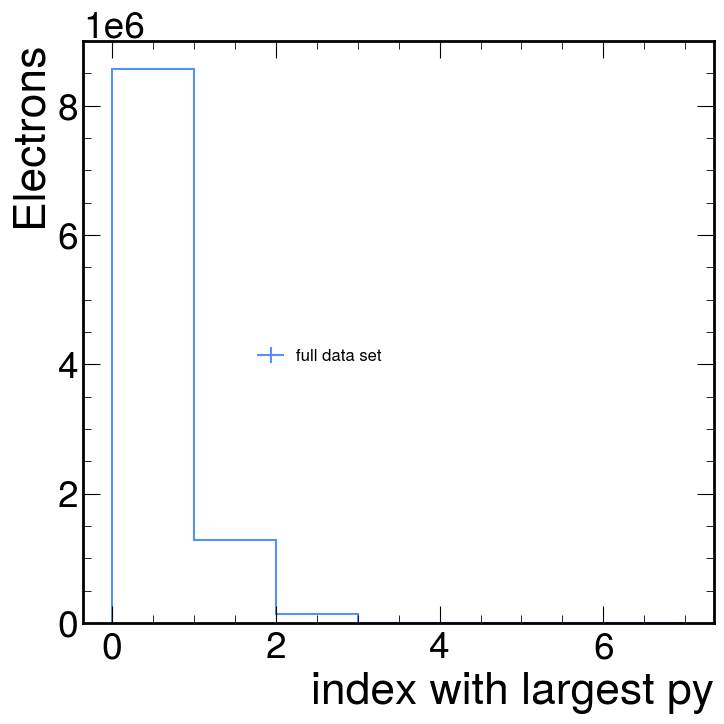

In [ ]:
plt.style.use(hep.style.ROOT)
plt.rcParams.update({'font.size': 32})

#create axis
gen_axis = hist.axis.Regular(7, 0, 7, name='residuals', label=r'index with largest py')
h1 = hist.Hist(gen_axis)
h2 = hist.Hist(gen_axis)
h3 = hist.Hist(gen_axis)
h4 = hist.Hist(gen_axis)

#fill histogram
h1.fill(py_index[:, 0])
# h2.fill(pad_TruthEcal_y_z[:, 0])
# h3.fill(Electron_E_py_3[Electron_E_py_3!=0])
# h4.fill(truth_E_py)

# #calculate means
# m_e = np.mean(mean_x[mean_x>-15])
# m_pos = np.mean(mean_x_pos[mean_x_pos>-15])
# m_pT = np.mean(mean_x_pT[mean_x_pT>-15])

#print out histogram
h1
h2
h3
h4


#make real histogram
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

# use mplhep to directly plot the histogram
hep.histplot(
    h1, # histogram
    ax=axs,  # axis
    density=False, # whether to normalize the histogram to 1 or not
    label="full data set", # label of histogram
    flow="none"
)
# hep.histplot(
#     h2, # histogram
#     ax=axs,  # axis
#     density=False, # whether to normalize the histogram to 1 or not
#     label="truth at ecal", # label of histogram
#     flow="none"
# )
# hep.histplot(
#     h3, # histogram
#     ax=axs,  # axis
#     density=True, # whether to normalize the histogram to 1 or not
#     label="particle 3", # label of histogram
#     flow="none"
# )
# hep.histplot(
#     h4, # histogram
#     ax=axs,  # axis
#     density=True, # whether to normalize the histogram to 1 or not
#     label="truth", # label of histogram
#     flow="none"
# )


axs.set_ylabel("Electrons")
axs.legend(fontsize=12,bbox_to_anchor=(0.5, 0.5))
#plt.title(r"Layer 34")
fig.tight_layout()
fig.savefig("y_ecal_comp.png")

for rate plot

In [ ]:
pad_Electron_px_z_1 = pad_Electron_px_z[:, 1]
pad_Electron_px_z_1 = pad_Electron_px_z_1[pad_Electron_px_z_1!=0]

pad_Electron_px_z_2 = pad_Electron_px_z[:, 2]
pad_Electron_px_z_2 = pad_Electron_px_z_2[pad_Electron_px_z_2!=0]

pad_Electron_py_z_1 = pad_Electron_py_z[:, 1]
pad_Electron_py_z_1 = pad_Electron_py_z_1[pad_Electron_py_z_1!=0]

pad_Electron_py_z_2 = pad_Electron_py_z[:, 2]
pad_Electron_py_z_2 = pad_Electron_py_z_2[pad_Electron_py_z_2!=0]

multi-particle rate plot data

In [ ]:
py_2 = pad_Electron_py_z[:, 1]
py_1 = pad_Electron_py_z[:, 0]
py_0 = py_1[py_2 != 0]
py_100 = py_1[abs(py_2) > 100]
py_325 = py_1[abs(py_2) > 325]

remove 0s without z cut

In [ ]:
part2 = pad_Electron_py[:, 1]
part2 = part2[part2 != 0]

part3 = pad_Electron_py[:, 2]
part3 = part3[part3 != 0]

remove 0s with z cut

In [ ]:
part2_z = pad_Electron_py_z[:, 1]
part2_z = part2_z[part2_z != 0]

part3_z = pad_Electron_py_z[:, 2]
part3_z = part3_z[part3_z != 0]

filling histograms for rate plots

In [ ]:
gen_axis = hist.axis.Regular(1000, -0, 1000, name='residuals', label=r'Reco py / TruthEcal py')
h1 = hist.Hist(gen_axis)
h2 = hist.Hist(gen_axis)
h3 = hist.Hist(gen_axis)
h4 = hist.Hist(gen_axis)
h5 = hist.Hist(gen_axis)
h6 = hist.Hist(gen_axis)
h1.fill(abs(pad_Electron_py[:, 0]))
h2.fill(abs(part2))
h3.fill(abs(part3))
h4.fill(abs(pad_Electron_py_z[:, 0]))
h5.fill(abs(part2_z))
h6.fill(abs(part3_z))

Hist(Regular(1000, 0, 1000, name='residuals', label='Reco py / TruthEcal py'), storage=Double()) # Sum: 185189.0 (185423.0 with flow)

In [ ]:
h5

Hist(Regular(1000, 0, 1000, name='residuals', label='Reco py / TruthEcal py'), storage=Double()) # Sum: 2042129.0 (2054113.0 with flow)

In [ ]:
test1 = h1.values()
test2 = h2.values()
test3 = h3.values()
test4 = h4.values()
test5 = h5.values()
test6 = h6.values()


In [ ]:
rev_cum1 = np.cumsum(test1[::-1])[::-1] 
rev_cum1 = ((rev_cum1/9999979)*37000000)

rev_cum2 = np.cumsum(test2[::-1])[::-1] 
rev_cum2 = ((rev_cum2/9999979)*37000000)

rev_cum3 = np.cumsum(test3[::-1])[::-1] 
rev_cum3 = ((rev_cum3/9999979)*37000000)

rev_cum4 = np.cumsum(test4[::-1])[::-1] 
rev_cum4 = ((rev_cum4/9999979)*37000000)

rev_cum5 = np.cumsum(test5[::-1])[::-1] 
rev_cum5 = ((rev_cum5/9999979)*37000000)

rev_cum6 = np.cumsum(test6[::-1])[::-1] 
rev_cum6 = ((rev_cum6/9999979)*37000000)

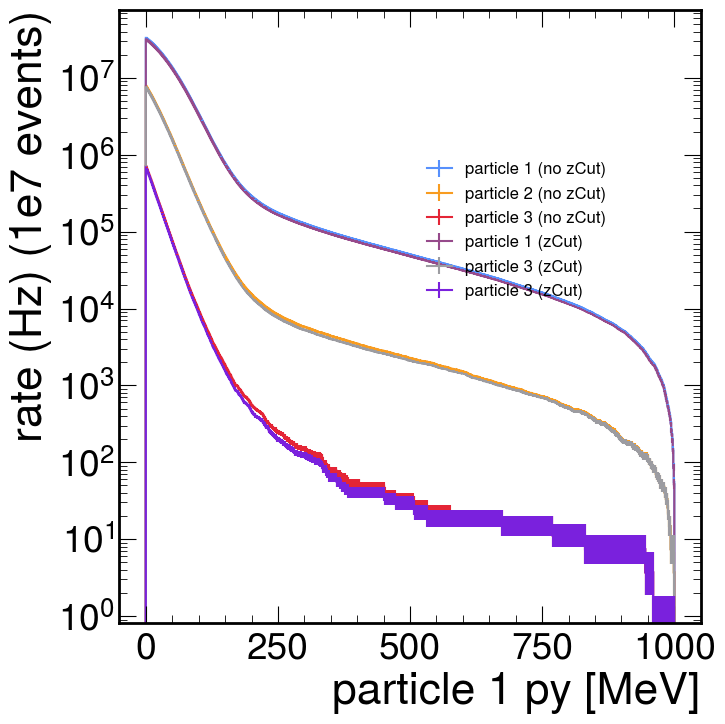

In [ ]:
plt.style.use(hep.style.ROOT)
plt.rcParams.update({'font.size': 32})

#create axis
gen_axis = hist.axis.Regular(1000, 0, 1000, name='residuals', label=r'particle 1 py [MeV]')
h = hist.Hist(gen_axis)
t = hist.Hist(gen_axis)
r = hist.Hist(gen_axis)
a = hist.Hist(gen_axis)
b = hist.Hist(gen_axis)
c = hist.Hist(gen_axis)

#fill histogram
h[0:1000] = rev_cum1
t[0:1000] = rev_cum2
r[0:1000] = rev_cum3
a[0:1000] = rev_cum4
b[0:1000] = rev_cum5
c[0:1000] = rev_cum6

#print out histogram
h
t

#make real histogram
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

# use mplhep to directly plot the histogram
hep.histplot(
    h, # histogram
    ax=axs,  # axis
    density=False, # whether to normalize the histogram to 1 or not
    label="particle 1 (no zCut)", # label of histogram
    flow="none"
)
hep.histplot(
    t, # histogram
    ax=axs,  # axis
    density=False, # whether to normalize the histogram to 1 or not
    label="particle 2 (no zCut)", # label of histogram
    flow="none"
)
hep.histplot(
    r, # histogram
    ax=axs,  # axis
    density=False, # whether to normalize the histogram to 1 or not
    label="particle 3 (no zCut)", # label of histogram
    flow="none"
)
hep.histplot(
    a, # histogram
    ax=axs,  # axis
    density=False, # whether to normalize the histogram to 1 or not
    label="particle 1 (zCut)", # label of histogram
    flow="none"
)
hep.histplot(
    b, # histogram
    ax=axs,  # axis
    density=False, # whether to normalize the histogram to 1 or not
    label="particle 3 (zCut)", # label of histogram
    flow="none"
)
hep.histplot(
    c, # histogram
    ax=axs,  # axis
    density=False, # whether to normalize the histogram to 1 or not
    label="particle 3 (zCut)", # label of histogram
    flow="none"
)


axs.set_ylabel("rate (Hz) (1e7 events)")
axs.set_yscale("log")
axs.legend(fontsize=12,bbox_to_anchor=(0.5, 0.5))
# plt.vlines(570, 0, 10e8, 'b')
# #plt.text(263, 100000 ,'2 kHz--293 MeV',rotation=90, fontsize = 12)
# plt.vlines(11365, 0, 10e8, 'b')
# plt.text(10900, 100000 ,'1 kHz--11,365 MeV',rotation=90, fontsize = 12)
# plt.vlines(600, 0, 10e8, 'y')
# plt.vlines(655, 0, 10e8, 'y')
fig.tight_layout()
fig.savefig("comp_reco_pT_zCut_rate.png")

In [ ]:
print(h)

2D Histograms

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x135f04590>, cbar=<matplotlib.colorbar.Colorbar object at 0x135e4eb10>, text=[])

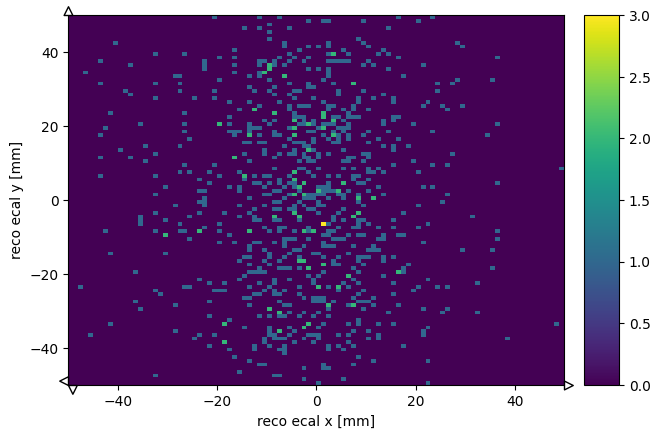

In [ ]:
x_axis = hist.axis.Regular(100, -50, 50, name='p', label=r'reco ecal x [mm]')
y_axis = hist.axis.Regular(100, -50, 50, name='energy', label=r'reco ecal y [mm]')
hist_ecal = hist.Hist(x_axis, y_axis)


x = reco_ecal_x_py
y = reco_ecal_y_py

hist_ecal.fill(x,y)

import matplotlib.colors as colors

hep.hist2dplot(hist_ecal)

2D log plot

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x135cda210>, cbar=<matplotlib.colorbar.Colorbar object at 0x1360a2300>, text=[])

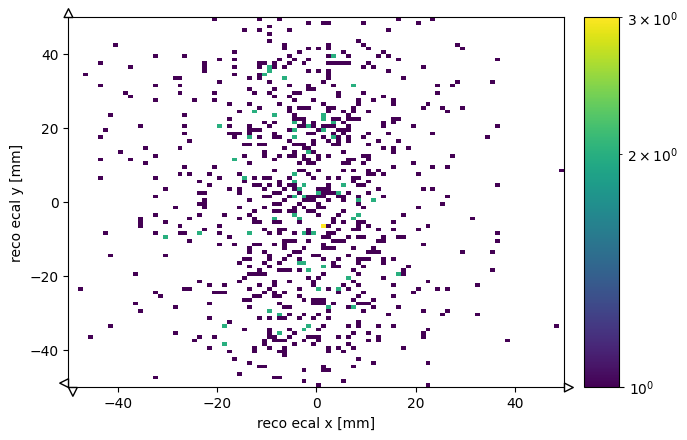

In [ ]:
hep.hist2dplot(hist_ecal, **{'norm': colors.LogNorm()})

In [ ]:
pos_mask_temp = nElectron_d[abs(Electron_dx_d)>10]
dy_temp = Electron_dy_d[abs(Electron_dx_d)>10]
pos_data = pos_mask_temp[abs(dy_temp)>10]

In [ ]:
r_E_d = pad_Electron_E[:, 0]
t_E_d = pad_TruthEcal_E[:, 0]

In [ ]:
# reco x
mult_x_1 = pad_Electron_ecal_x[r_E_d/t_E_d < 0.5]
mult_x_2 = pad_Electron_ecal_x[r_E_d/t_E_d > 1.5]
mult_x = np.append(mult_x_1, mult_x_2, axis=0)

# reco y
mult_y_1 = pad_Electron_ecal_y[r_E_d/t_E_d < 0.5]
mult_y_2 = pad_Electron_ecal_y[r_E_d/t_E_d > 1.5]
mult_y = np.append(mult_y_1, mult_y_2, axis=0)

# reco E
mult_E_1 = pad_Electron_E[r_E_d/t_E_d < 0.5]
mult_E_2 = pad_Electron_E[r_E_d/t_E_d > 1.5]
mult_E = np.append(mult_E_1, mult_E_2, axis=0)

# truth E
mult_t_E_1 = pad_TruthEcal_E[r_E_d/t_E_d < 0.5]
mult_t_E_2 = pad_TruthEcal_E[r_E_d/t_E_d > 1.5]
mult_truth_E = np.append(mult_t_E_1, mult_t_E_2, axis=0)

# truth ecal x
mult_t_x_1 = pad_TruthEcal_x[r_E_d/t_E_d < 0.5]
mult_t_x_2 = pad_TruthEcal_x[r_E_d/t_E_d > 1.5]
mult_truth_x = np.append(mult_t_x_1, mult_t_x_2, axis=0)

# truth ecal y
mult_t_y_1 = pad_TruthEcal_y[r_E_d/t_E_d < 0.5]
mult_t_y_2 = pad_TruthEcal_y[r_E_d/t_E_d > 1.5]
mult_truth_y = np.append(mult_t_y_1, mult_t_y_2, axis=0)

# truth target x
mult_tr_x = pad_Truth_x[pad_nElectron>2]
mult_tr_x_1 = pad_Truth_x[r_E_d/t_E_d < 0.5]
mult_tr_x_2 = pad_Truth_x[r_E_d/t_E_d > 1.5]
mult_tr_x = np.append(mult_tr_x_1, mult_tr_x_2, axis=0)

# truth target y
mult_tr_y_1 = pad_Truth_y[r_E_d/t_E_d < 0.5]
mult_tr_y_2 = pad_Truth_y[r_E_d/t_E_d > 1.5]
mult_tr_y = np.append(mult_tr_y_1, mult_tr_y_2, axis=0)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:246: RuntimeWarning: divide by zero encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


In [ ]:
mult_x = pad_Electron_ecal_x_py
mult_y = pad_Electron_ecal_y_py
mult_E = pad_Electron_E_py
mult_truth_pT = pad_TruthEcal_pT_py
mult_pT = pad_Electron_pT_py
mult_truth_E = pad_TruthEcal_E_py
mult_depth = pad_Electron_depth_py
mult_truth_x = pad_TruthEcal_x_py
mult_truth_y = pad_TruthEcal_y_py
mult_tr_x = pad_Truth_x_py
mult_tr_y = pad_Truth_y_py
mult_z = pad_Electron_zClus_py

In [ ]:
mult_E

<Array [[4.73e+03, 1.93e+03, 705, ..., 0, 0], ...] type='1012 * var * float64'>

In [ ]:
x_data = mult_x[1006]
y_data = mult_y[1006]
energy_data = mult_E[1006]
truth_pT = mult_truth_pT[1006]
pT_data = mult_pT[1006]
depth = mult_depth[1006]
z_data = mult_z[1006]

In [ ]:
print(energy_data)

[6.17e+03, 700, 818, 0, 0, 0, 0, 0]


In [ ]:
mult_truth_E[1006]

<Array [7.87e+03, 7.87e+03, ..., 7.87e+03, 7.87e+03] type='8 * float32'>

Scatter plot

used for creating the Ecal pattern imposed on event displays

In [ ]:
def plot_ecal(ax):
    
    from matplotlib.patches import RegularPolygon
    
    offCoord = [
    [0,0],
    [148.523,85.75],
    [148.523,-85.75],
    [-148.523,-85.75],
    [-148.523,85.75],
    [0,171.5],
    [0,-171.5],]
    
    ax.set_aspect('equal')
    for c in offCoord:
        hex = RegularPolygon((c[1], c[0]), numVertices=6, radius=98.149546, #85.,
                             alpha=0.2, edgecolor='k', orientation=3.1415*(2/3), facecolor = "moccasin")
        ax.add_patch(hex)
        
    plt.autoscale(enable = True)

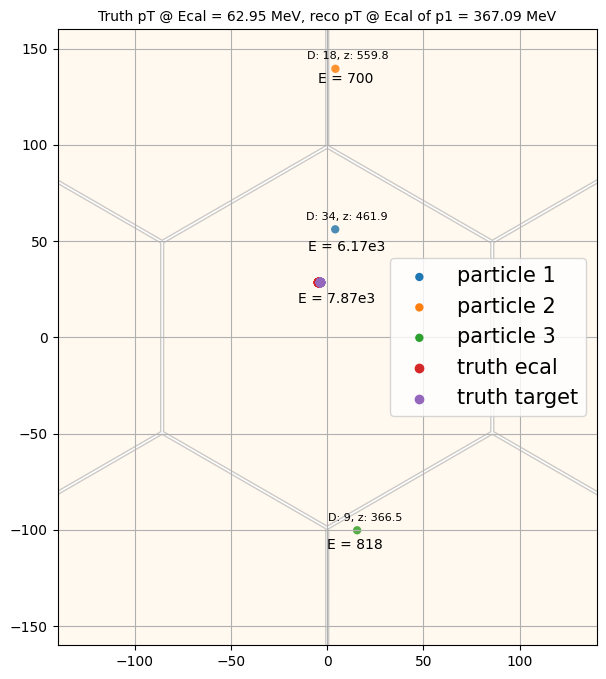

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
labels = ["particle 1", "particle 2", "particle 3", "particle 4"]
for i in [0, 1, 2]:
    x = x_data[i]
    y = y_data[i]
    lbl = labels[i]
    ax.scatter(x, y, label=lbl, edgecolors='none')
    plt.text(x-15, y+5, "D: "+str(depth[i])+", z: "+str(round(z_data[i], 1)), fontsize = 8)

plot_ecal(ax)
ax.scatter(mult_truth_x[1006], mult_truth_y[1006], label="truth ecal")
ax.scatter(mult_tr_x[1006], mult_tr_y[1006], label="truth target")
ax.legend(fontsize = 15)
ax.grid("on")
ax.set_xlim([-140, 140])
ax.set_ylim([-160, 160])
plt.title(r'Truth pT @ Ecal = '+str(round(truth_pT[0], 2))+' MeV, reco pT @ Ecal of p1 = '+str(round(pT_data[0], 2))+' MeV', fontsize = 10)
plt.text(-15, 18, 'E = 7.87e3', fontsize = 10)
plt.text(-10, 45, 'E = 6.17e3', fontsize = 10)
plt.text(-5, 132, 'E = 700', fontsize = 10)
plt.text(0, -110, 'E = 818', fontsize = 10)
#plt.text(50, 11, 'E = 651', fontsize = 10)

plt.show()

Fitting (Gaussian)

In [ ]:
# cutting px data for fitting
frac_px_e_1_fit = cut_for_fit(frac_px_e_1, 2, -2)
frac_py_e_1_fit = cut_for_fit(frac_py_e_1, -30, 30)

In [ ]:
plt.style.use(hep.style.ROOT)
plt.rcParams.update({'font.size': 32})

energy_axis = hist.axis.Regular(100, -50, 50, name='residuals', label=r'Reco py/Truth py [MeV]')
hist_Electron_e = hist.Hist(energy_axis)

hist_Electron_e.fill(frac_py_e_3)

#print out histogram
hist_Electron_e

#make real histogram
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

# use mplhep to directly plot the histogram
hep.histplot(
    hist_Electron_e, # histogram
    ax=axs,  # axis
    density=True, # whether to normalize the histogram to 1 or not
    label="full range", # label of histogram
    flow="none"
)

axs.set_ylabel("Electrons")
axs.legend(fontsize=12,bbox_to_anchor=(0.6, 0.5))
axs.set_xlim([-50, 50])
fig.tight_layout()
fig.savefig("comparison_e_fit.png")

datos = frac_py_e_3

(mu, sigma) = norm.fit(datos)

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
axs.plot(x, norm.pdf(x, mu, sigma),
       'r-', lw=5, alpha=0.8, label='norm pdf')

#plot
plt.xlabel('Reco py/Truth py')
plt.ylabel('Electrons (Density)')
plt.title(r'$\mathrm{Histogram\ of\ py}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)
plt.show()